##### Assignment 3 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

## Question 1  (**5 marks**)

You have been asked to analyse a data set containing the height (in inches) and weight (in pounds)of 25000 people, and to determine whether there is a significant correlation between the weight of a person and its height. The data set is available in the CSV file "height_weight.csv"

Q1.a) load the data set in a numpy array or a pandas DataFrame (**1 mark**)

In [2]:
Height_Weight = np.loadtxt('height_weight.csv',skiprows=1)
Height = Height_Weight[:,0]
Weight = Height_Weight[:,1]


Q1.b) create a figure with two subplots, and show the box-whiskers plots of heights and weights (**1 mark**)


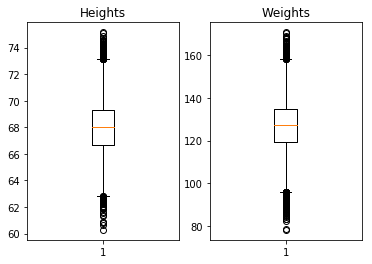

In [3]:
f, ax = plt.subplots(1,2)
ax[0].boxplot(Height);
ax[1].boxplot(Weight);
ax[0].set_title('Heights'); 
ax[1].set_title('Weights');

Q1.c) create a scatter plot of height vs weight, and fit it with a linear model (hint: use the numpy function __polyfit()__) (**1 mark**)

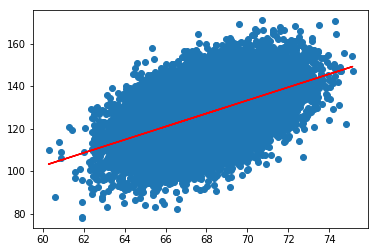

In [4]:
lm = np.polyfit(Height,Weight,1)
plt.scatter(Height,Weight);
plt.plot(Height,lm[0]*Height + lm[1],'r')

Q1.d) compute the residuals with respect to the linear regression obtained above. Plot the histogram of the residuals. (**1 mark**) 

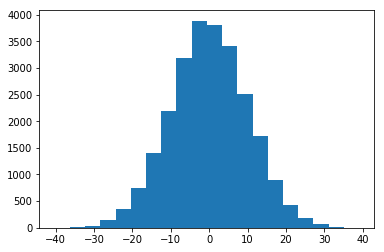

In [5]:
r = Weight-(lm[0]*Height + lm[1])
plt.hist(r,bins=20);

Q1.e) create a box-whiskers plot of the residuals obtained in the previous point. By looking at the distribution of residuals and at their box-whisker plot, what can you say about the linear fit? Is it reasonable?  Motivate your answer (**1 mark**)


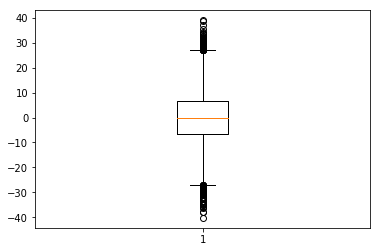

In [6]:
plt.boxplot(r);

Q1e)
The plot is reasonable as you can see from the boxplot that the residuals are centred around 0 and they are fairly symmetric.

## Question 2 (5 marks)

The file "diamonds.csv" contains information about more than 53,000 diamonds of different size, quality, and price. 

Q2.a) load the file in a Pandas DataFrame, and print the average carat by colour (**1 mark**)

In [13]:
Diamonds = pd.read_csv('diamonds.csv')
Diamonds.groupby(['color'])['carat'].mean()

color
D    0.657795
E    0.657867
F    0.736538
G    0.771190
H    0.911799
I    1.026927
J    1.162137
Name: carat, dtype: float64

Q2.b) How many distinct cuts, colours, and clarity classes are there, respectively? (**1 mark**)

In [14]:
print('Number of distinct cuts =',len(Diamonds['cut'].unique()))
print('Number of distinct colours =',len(Diamonds['color'].unique()))
print('Number of distinct clarity classes =',len(Diamonds['clarity'].unique()))

Number of distinct cuts = 5
Number of distinct colours = 7
Number of distinct clarity classes = 8


Q2.c) create box-whiskers plots of "price" for each type of "cut" (**1 mark**)

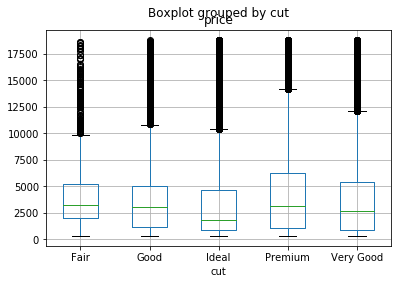

In [15]:
Diamonds.boxplot(column ='price', by = 'cut');

Q2.d) create a box-whisker plot of "carats" for diamonds of "Premium" cut. Are there any outliers? Motivate your answer(**1 mark**)

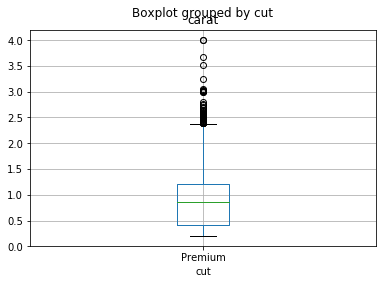

In [16]:
#Diamonds.boxplot(column = 'carat', by =Diamonds.loc[Diamonds.cut = 'Premium'])
PremiumCut = Diamonds.loc[Diamonds.cut =='Premium']
PremiumCut.boxplot(column = 'carat', by = 'cut');

In [41]:
a = PremiumCut['carat']
a_sorted = a.sort_values(0)
LQ = np.percentile(a_sorted,25)
UQ = np.percentile(a_sorted,75)
IQR = UQ - LQ
#len(PremiumCut.loc[PremiumCut.carat >U])
LowerBound = LQ-(1.5*IQR)
UpperBound = UQ+(1.5*IQR)
len(PremiumCut.loc[PremiumCut.carat>UpperBound])

77

We can see from the boxplot above that there are clearly outliers in the upper region. Precisely 77

Q2.e) create a Q-Q (quantile-quantile) plot of the price of diamonds with "Ideal" cut, taking as reference an appropriate Gaussian distribution. What can you conclude by looking at the plot? (**1 mark**)

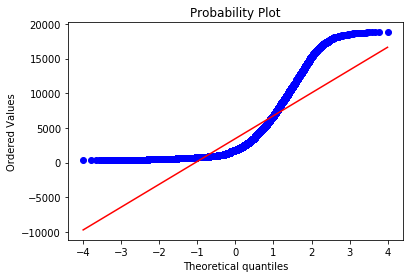

In [42]:
IdealCut = Diamonds.loc[Diamonds.cut =='Ideal']
IdealCutPrice = IdealCut['price']

st.probplot(IdealCutPrice,plot=plt);


We can see from the above QQ plot that the distribution of price with ideal cut and the normal distribution are not compatible .